In [39]:
import sys
sys.path.append("..")

In [40]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [41]:
results_QK = load_feather_folder_as_pd("../data/results/DE_0_35")

['../data/results/DE_0_35\\0.feather', '../data/results/DE_0_35\\1.feather', '../data/results/DE_0_35\\10.feather', '../data/results/DE_0_35\\11.feather', '../data/results/DE_0_35\\12.feather', '../data/results/DE_0_35\\13.feather', '../data/results/DE_0_35\\14.feather', '../data/results/DE_0_35\\15.feather', '../data/results/DE_0_35\\16.feather', '../data/results/DE_0_35\\17.feather', '../data/results/DE_0_35\\18.feather', '../data/results/DE_0_35\\19.feather', '../data/results/DE_0_35\\2.feather', '../data/results/DE_0_35\\20.feather', '../data/results/DE_0_35\\21.feather', '../data/results/DE_0_35\\22.feather', '../data/results/DE_0_35\\23.feather', '../data/results/DE_0_35\\24.feather', '../data/results/DE_0_35\\25.feather', '../data/results/DE_0_35\\26.feather', '../data/results/DE_0_35\\27.feather', '../data/results/DE_0_35\\28.feather', '../data/results/DE_0_35\\29.feather', '../data/results/DE_0_35\\3.feather', '../data/results/DE_0_35\\30.feather', '../data/results/DE_0_35\\31

c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

In [42]:
results_QK

,f_sol,optimal_alpha,mse,method,loss_name,domain,executor_type,encoding_circuit,num_qubits,num_layers,mse_history,loss_history,eta
0,"[1.000197073225142, 0.7666158313158564, 0.2906...","[-2.6388855183847024, -80.84286731852882, 136....",0.000002,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,2,1,"[74.55631309849653, 53.78877608652001, 30.7924...","[209.71699148978297, 176.3408001254935, 132.19...",0.01
1,"[1.000264764278652, 0.7656617733857298, 0.2884...","[-3.930720882351023, -75.21304221040437, 136.0...",0.000001,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,2,1,"[75.49861873612312, 53.30573881267424, 26.3166...","[416.79918786430255, 352.3662063514854, 298.62...",0.021544
2,"[1.000187395795498, 0.768473791204428, 0.28857...","[-0.9613098935931791, -5.806967251122612, 21.2...",0.000003,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[35.658943865015154, 5.443187337570932, 2.6957...","[110.90220353460035, 87.50863716386503, 79.718...",0.01
3,"[1.0004387396955494, 0.7687255053247104, 0.288...","[-0.9669574276594797, -5.7157776720946645, 21....",0.000003,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[36.37520316686714, 6.40073159708147, 3.211723...","[224.5806855462539, 196.47924405186444, 177.45...",0.021544
4,"[1.0001191136245284, 0.7664343095360835, 0.286...","[-1.1200430858698314, -11.12090103142274, 45.0...",0.000001,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[36.820284641897466, 7.322795505554515, 5.0978...","[468.09328379885847, 439.81268723714595, 404.4...",0.046416
5,"[1.0002512892566189, 0.766556668386497, 0.2868...","[-1.1195665181012358, -11.135490876487703, 45....",0.000001,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[37.052922907237665, 17.518876807918325, 12.20...","[991.9320687460776, 695.3877123191986, 626.976...",0.1
6,"[1.000545965212823, 0.7668357118099511, 0.2870...","[-1.1183943790435003, -11.136686911684501, 45....",0.000002,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[37.166617905172224, 18.043958237617804, 12.86...","[2120.106410096407, 1494.285775582559, 1354.13...",0.215443
7,"[1.0012583209973913, 0.7675197743110242, 0.287...","[-1.118349081720564, -11.070980581160894, 44.8...",0.000003,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[37.2206250938037, 18.296387076902093, 13.1913...","[4550.490125522935, 3215.2052449758826, 2920.6...",0.464159
8,"[1.0027060429395172, 0.7688782187082093, 0.289...","[-1.1186513389243693, -11.05164829648584, 44.8...",0.000005,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[37.24596003116002, 18.41534512067086, 13.3464...","[9786.50136483723, 6922.667986901257, 6295.391...",1.0
9,"[1.0055238822701031, 0.7712532452813072, 0.291...","[-1.3337129255029068, -9.562318660123447, 41.7...",0.000013,PQK,paper,"[0.0, 0.03103448275862069, 0.06206896551724138...",pennylane,HEEAndChebyshevTower,3,1,"[37.2577777501402, 18.470959453876457, 13.4193...","[21067.102849927032, 14910.086550302369, 13566...",2.154435


In [43]:
results_QK
#include an extra column called epochs, which generates and array from 0 to the number of epochs

results_QK["epochs"] = results_QK["loss_history"].apply(lambda x: np.arange(len(x)))
#create a new column called final_mse_loss, which is the last element of the loss_history column, and final_loss_history, which is the last element of the loss_history column

In [44]:
results_QK_exploded = results_QK.explode(["epochs", "loss_history", "mse_history"])

results_QK_exploded["epochs"] = results_QK_exploded["epochs"].astype(int)

#results_QK_exploded["loss_history"] change name to results_QK_exploded["$\mathcal{L}(f^\prime(x), f(x), x)$"]
loss_history_str = "$\mathcal{L}(f^\prime(x), f(x), x)$"
mse_history_str = r"$|f(x)-f_{\mathrm{exact}}(x)|^2$"


paper_str = "$\lambda e^{-\lambda k x} \sin(\lambda x) + \lambda k f(x) + df/dx$ = 0"
log_str = r"$\frac{df}{dx} - \lambda e^{kf(x)} = 0$"



results_QK_exploded["loss_name"] = results_QK_exploded["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results_QK_exploded["loss_name"] = results_QK_exploded["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)

results_QK["loss_name"] = results_QK["loss_name"].apply(lambda x: paper_str if x == "paper" else x)
results_QK["loss_name"] = results_QK["loss_name"].apply(lambda x: log_str if x == "log_ode" else x)

results_QK["Final " + loss_history_str] = results_QK["loss_history"].apply(lambda x: x[-1])
results_QK["Final " + mse_history_str] = results_QK["mse_history"].apply(lambda x: x[-1])

results_QK_exploded[loss_history_str] = results_QK_exploded["loss_history"]
results_QK_exploded[mse_history_str] = results_QK_exploded["mse_history"]



In [45]:
#concatenate the two dataframes
results = pd.concat([results_QK_exploded])
results["Number of qubits"] = results["num_qubits"]
results["Iteration"] = results["epochs"]


C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: Future

(0.0, 180.0)

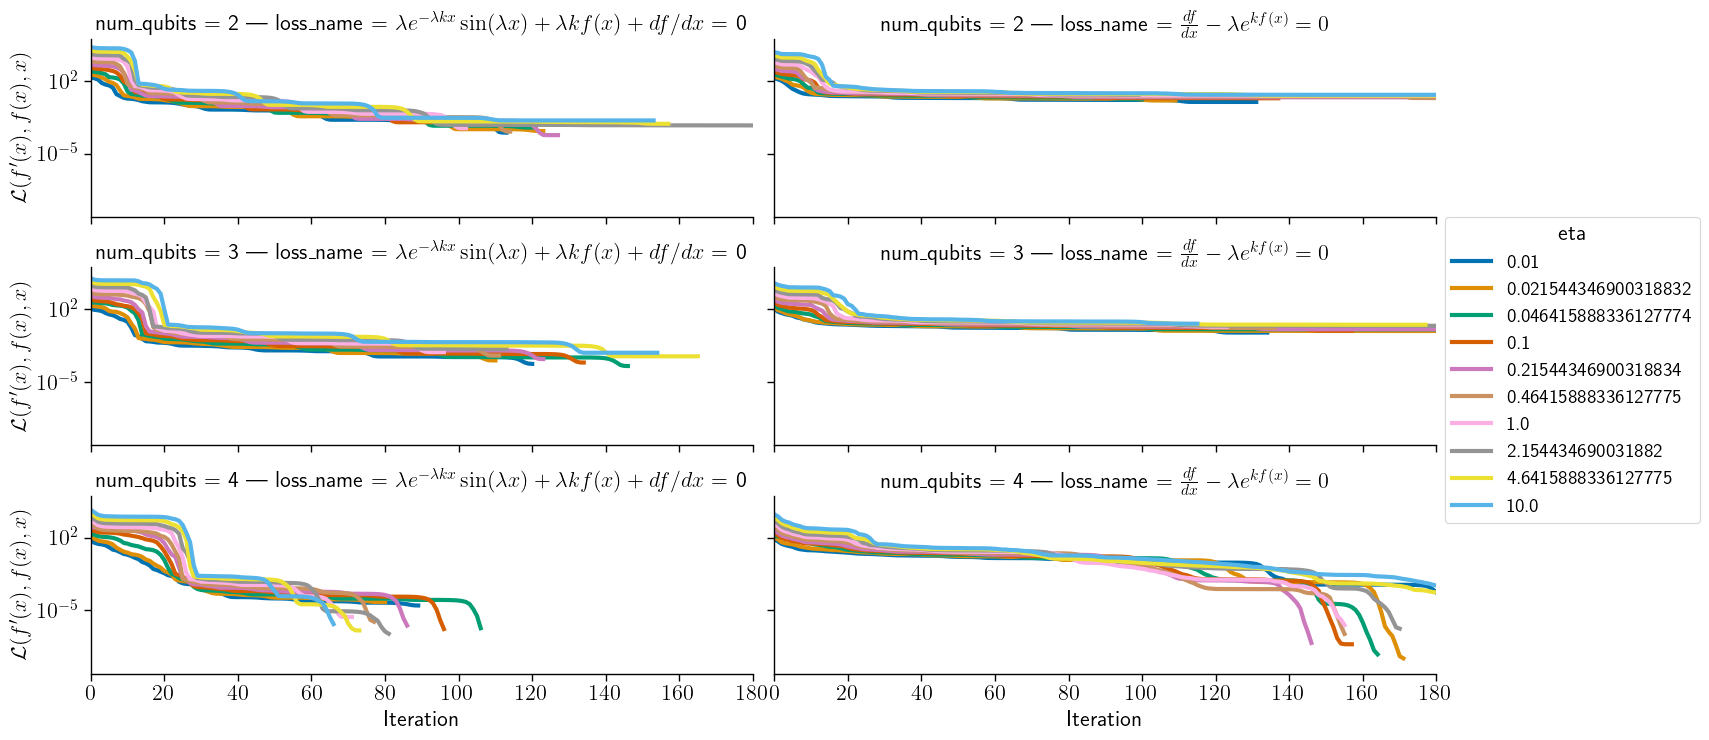

In [47]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})


palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=loss_history_str, 
                data=results,
                kind="line", 
                col="loss_name", 
                row="num_qubits",
                hue="eta",
                height=2.5,  # Adjust the height as needed
                aspect=3,  
                palette=palette,
                linewidth=3
                )

#include loss name in y axis

#g.set_titles(" {col_name}")
g.set(yscale="log") 

leg = g._legend
leg.set_frame_on(True)

plt.xlim(0, 180)


C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: Future

(0.0, 180.0)

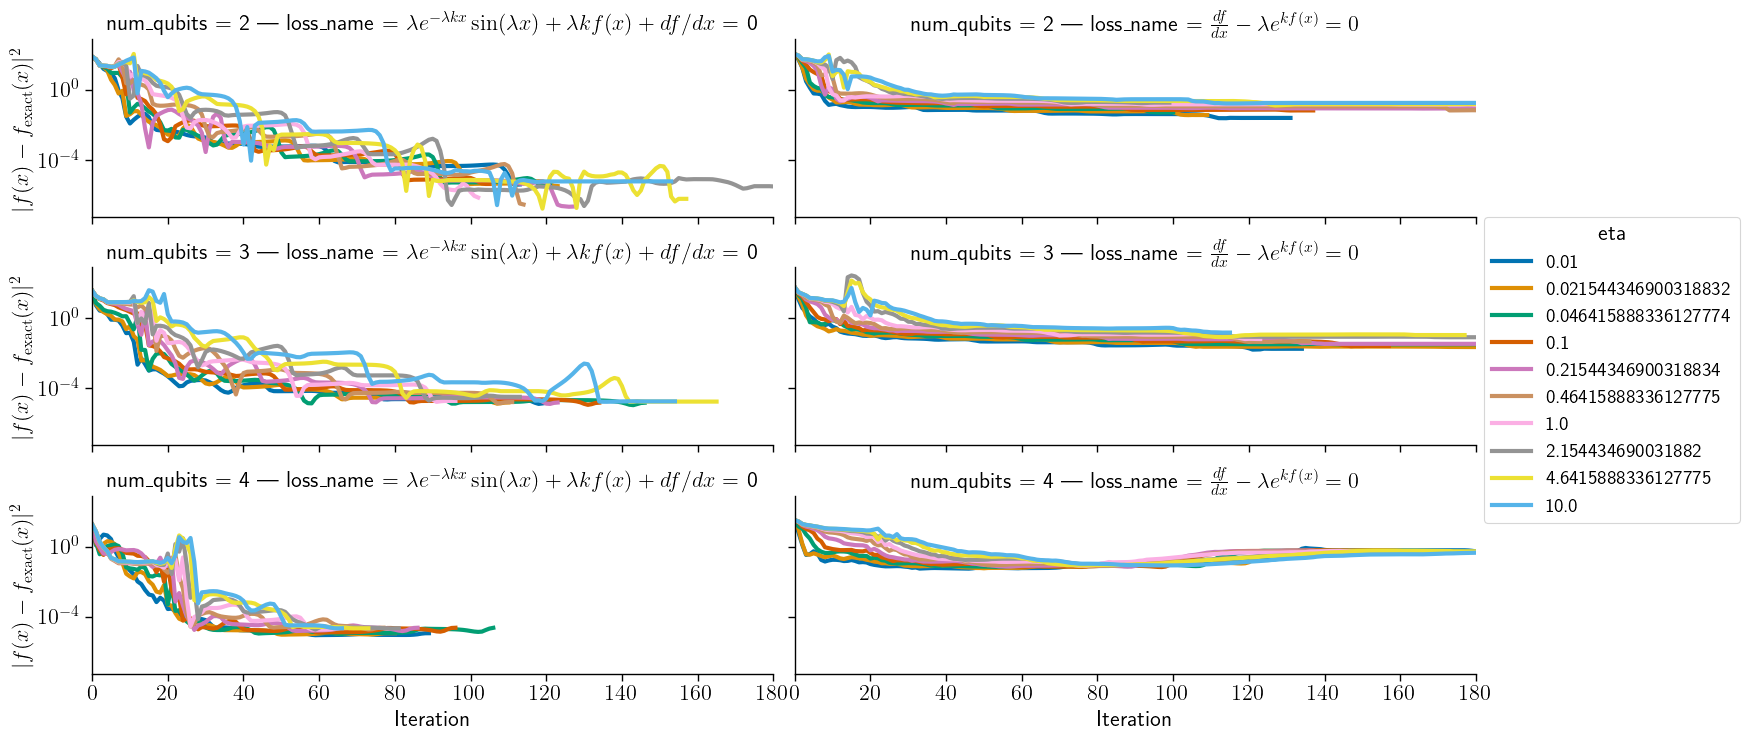

In [48]:
import seaborn as sns

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":6,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":16,  'lines.linewidth': 3})


palette = sns.color_palette("colorblind", 10)
g = sns.relplot(x="Iteration", y=mse_history_str, 
                data=results,
                kind="line", 
                col="loss_name", 
                row="num_qubits",
                hue="eta",
                height=2.5,  # Adjust the height as needed
                aspect=3,  
                palette=palette,
                linewidth=3
                )

#include loss name in y axis

#g.set_titles(" {col_name}")
g.set(yscale="log") 

leg = g._legend
leg.set_frame_on(True)

plt.xlim(0, 180)


In [49]:
results["min " + mse_history_str] = results.groupby(["method", "loss_name", "num_qubits"])["mse_history"].transform("min")
results["min " + loss_history_str] = results.groupby(["method", "loss_name", "num_qubits"])["loss_history"].transform("min")

mse_df = results[["method", "loss_name", "Number of qubits", "min " + mse_history_str]].drop_duplicates().rename(columns={"min " + mse_history_str: "min_loss"})
mse_df["Type of Loss"] = mse_history_str

true_loss_df = results[["method", "loss_name", "Number of qubits", "min " + loss_history_str]].drop_duplicates().rename(columns={"min " + loss_history_str: "min_loss"})
true_loss_df["Type of Loss"] = loss_history_str

combined_df = pd.concat([mse_df, true_loss_df])
#rename min_loss to Loss
combined_df = combined_df.rename(columns={"min_loss": "Loss"})
combined_df = combined_df.rename(columns={"method": "Method"})


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_29448\338040746.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.relplot(x="eta", y="Final " + loss_history_str ,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futur

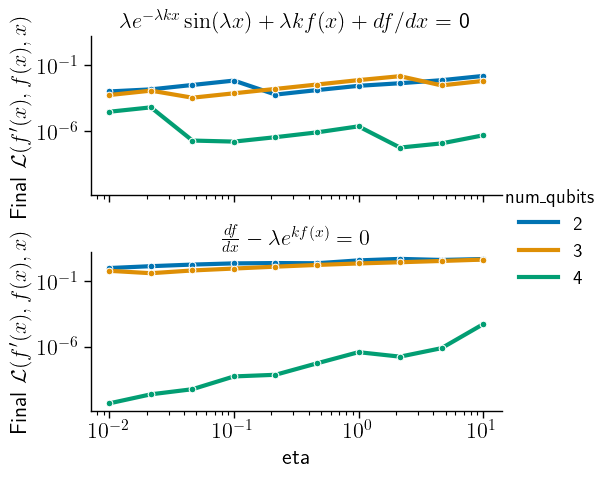

In [51]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

g = sns.relplot(x="eta", y="Final " + loss_history_str ,
                data=results_QK,
                kind="line", 
                row="loss_name", 
                hue="num_qubits",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title
g.set_titles("{row_name}")
g.set(yscale="log", xscale="log")

leg = g._legend

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_29448\3677763955.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.relplot(x="eta", y="Final " + mse_history_str,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future

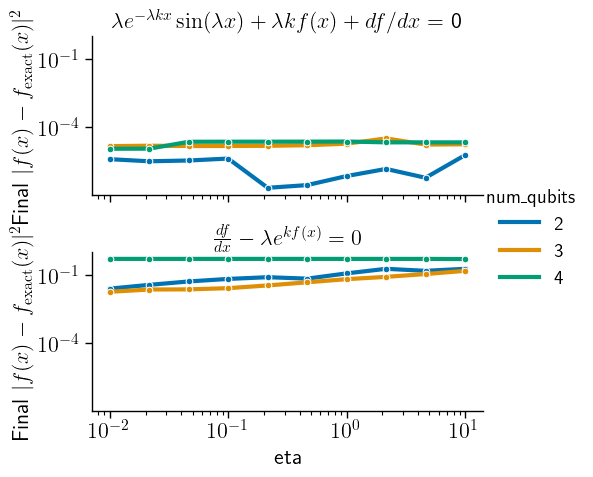

In [52]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

g = sns.relplot(x="eta", y="Final " + mse_history_str,
                data=results_QK,
                kind="line", 
                row="loss_name", 
                hue="num_qubits",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title
g.set_titles("{row_name}")
g.set(yscale="log", xscale="log")

leg = g._legend

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

In [95]:
mse_df = results_QK.copy()
#mse_df drop column loss_history str
mse_df = mse_df.drop(columns=["Final " + loss_history_str])
mse_df["Loss"] = mse_df["Final " + mse_history_str]
mse_df["Type of Loss"] = mse_history_str

true_loss_df = results_QK.copy()
#true_loss_df drop column mse_history_str
true_loss_df = true_loss_df.drop(columns=["Final " +mse_history_str])
true_loss_df["Loss"] = true_loss_df["Final " + loss_history_str]
true_loss_df["Type of Loss"] = loss_history_str

combined_df = pd.concat([mse_df, true_loss_df])
#rename min_loss to Loss

#sort combined_df by mse_loss smallest to largest
combined_df = combined_df.sort_values(by="Final " + mse_history_str) #or loss_history_str
#drop 
combined_df_top = combined_df.drop_duplicates(subset=["num_qubits", "loss_name", "Type of Loss"])
combined_df_top = combined_df_top.drop(columns=["Final " + mse_history_str, "Final " + loss_history_str])

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_29448\2329486941.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x="num_qubits", y="Loss" ,
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jsl-rf\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(na

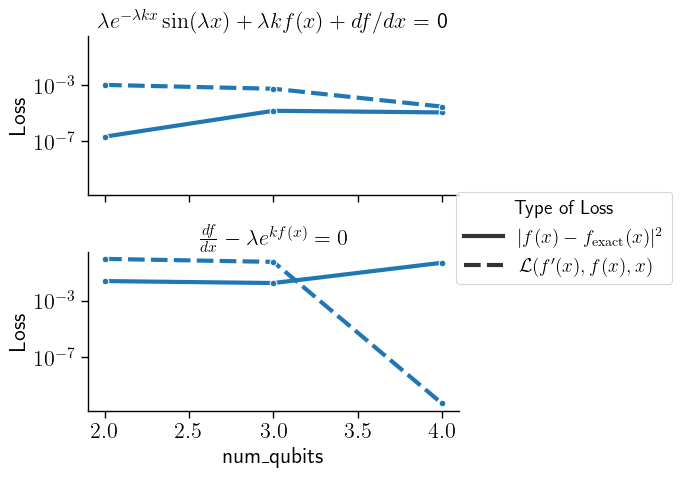

In [96]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits

##plt.legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#use this settings in sns
#include fancy box in set context
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})



g = sns.relplot(x="num_qubits", y="Loss" ,
                data=combined_df_top,
                kind="line", 
                row="loss_name", 
                style="Type of Loss",
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title
g.set_titles("{row_name}")
g.set(yscale="log")
#g.set_xlabels("Number of qubits", fontsize=16)
#g.set_ylabels("Loss", fontsize=16)
#g.add_legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#g tick_params
#change g legend fontsize


leg = g._legend

leg.set_frame_on(True)
#leg set fancybox


#g.tick_params(labelsize=14)



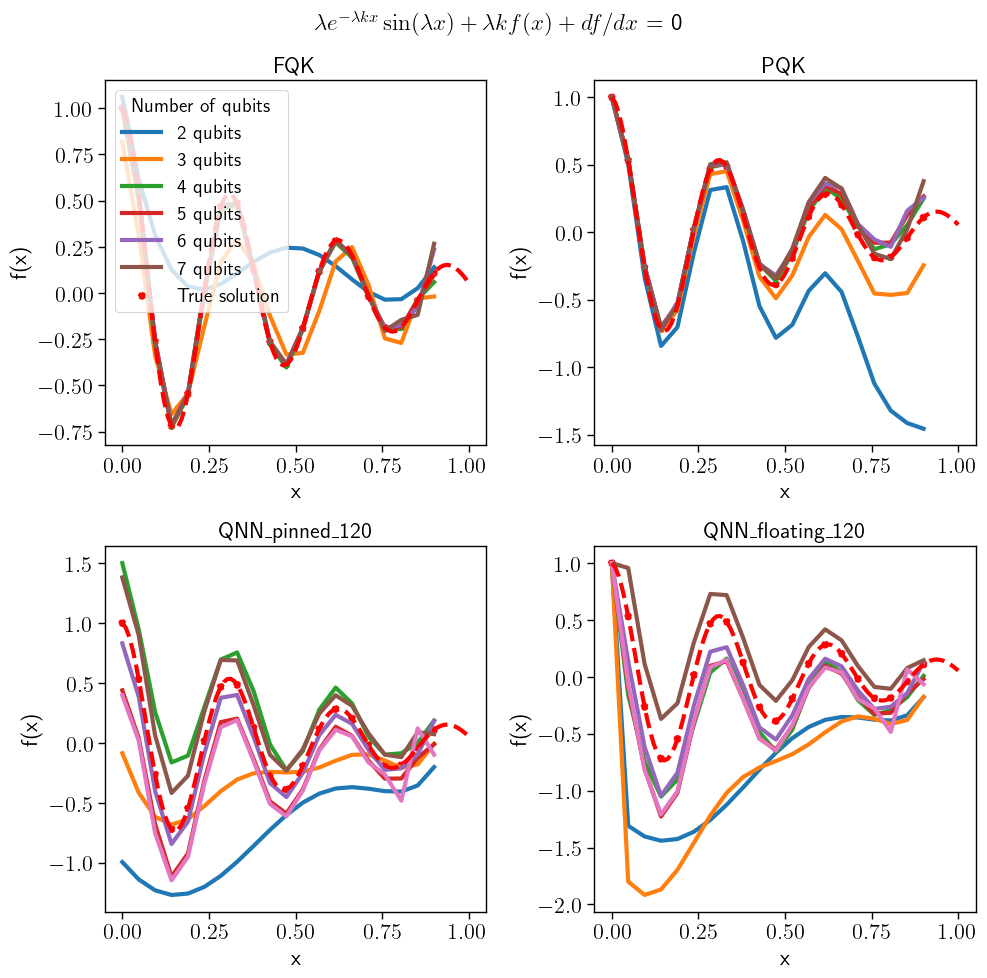

In [88]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits

##plt.legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#use this settings in sns
#include fancy box in set context
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})



fig, axs = plt.subplots(2, 2, figsize=(10, 10))

results_filtered = results[["domain", "f_sol", "num_qubits", "loss_name", "method"]]

index_pairs = [(0, 0), (0, 1), (1, 0), (1, 1)]
j = 0


f_initial = 1
true_sol = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, results_filtered["domain"].iloc[0])
true_sol_continous = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, np.linspace(0, 1, 100))



#suptitle
fig.suptitle(results_filtered["loss_name"].unique()[j])
for i in range(len(results_filtered["method"].unique())):
    ax = axs[index_pairs[i]]
    results_filtered_filtered = results_filtered[(results_filtered["method"] == results_filtered["method"].unique()[i]) & (results_filtered["loss_name"] == results_filtered["loss_name"].unique()[j])]
    #sort by number of qubits
    results_filtered_filtered = results_filtered_filtered.sort_values("num_qubits")
    for qubits in results_filtered_filtered["num_qubits"].unique():
        results_qb= results_filtered_filtered[results_filtered_filtered["num_qubits"] == qubits]
        ax.plot(results_qb["domain"].iloc[0], results_qb["f_sol"].iloc[0], label=str(qubits) + " qubits")
    ax.set_title(results_filtered["method"].unique()[i] )
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.scatter(results_filtered["domain"].iloc[0], true_sol, label="True solution", linestyle="--", color="red")
    ax.plot(np.linspace(0, 1, 100), true_sol_continous, linestyle="--", color="red")
    
    if i == 0:
        ax.legend(title="Number of qubits")

plt.tight_layout()



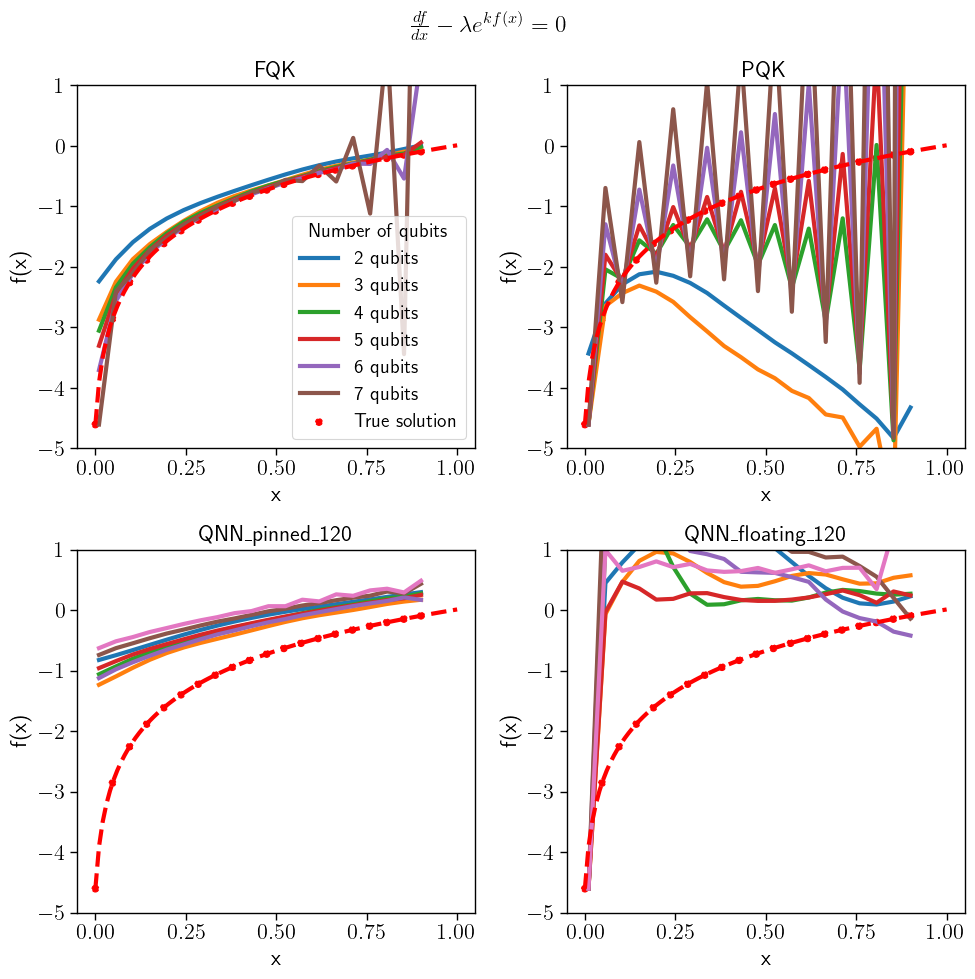

In [93]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits

##plt.legend(fontsize=14, edgecolor="black", fancybox=True, frameon=True, framealpha=0.9, labelspacing=0.25)
#use this settings in sns
#include fancy box in set context
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})



fig, axs = plt.subplots(2, 2, figsize=(10, 10))

results_filtered = results[["domain", "f_sol", "num_qubits", "loss_name", "method"]]

index_pairs = [(0, 0), (0, 1), (1, 0), (1, 1)]
j = 1


f_initial = np.log(0.01)
true_sol = odeint(mapping_of_derivatives_of_loss_functions["log_ode"], f_initial, results_filtered["domain"].iloc[0])
true_sol_continous = odeint(mapping_of_derivatives_of_loss_functions["log_ode"], f_initial, np.linspace(0, 1, 100))



#suptitle
fig.suptitle(results_filtered["loss_name"].unique()[j])
for i in range(len(results_filtered["method"].unique())):
    ax = axs[index_pairs[i]]
    results_filtered_filtered = results_filtered[(results_filtered["method"] == results_filtered["method"].unique()[i]) & (results_filtered["loss_name"] == results_filtered["loss_name"].unique()[j])]
    #sort by number of qubits
    results_filtered_filtered = results_filtered_filtered.sort_values("num_qubits")
    for qubits in results_filtered_filtered["num_qubits"].unique():
        results_qb= results_filtered_filtered[results_filtered_filtered["num_qubits"] == qubits]
        ax.plot(results_qb["domain"].iloc[0], results_qb["f_sol"].iloc[0], label=str(qubits) + " qubits")
    ax.set_title(results_filtered["method"].unique()[i] )
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.scatter(results_filtered["domain"].iloc[0], true_sol, label="True solution", linestyle="--", color="red")
    ax.plot(np.linspace(0, 1, 100), true_sol_continous, linestyle="--", color="red")
    ax.set_ylim(-5, 1)
    if i == 0:
        ax.legend(title="Number of qubits")

plt.tight_layout()

